**Importación de librerías necesarias**


In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score

from sklearn import datasets, metrics



**Preproceso**

Montar drive para la carga de datos

In [ ]:
drive.mount('/content/drive')


Mounted at /content/drive


Importación de los datos del dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/WineQT.csv")

Mostrar las primeras y últimas filas del dataframe importado


In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


Tipos de datos del df

In [ ]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

Mostrar parámetros estadísticos de los datos (media, desviación típica, cuartiles, etc.)

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


Mostrar un mapa de calor que indique la correlación entre vriables

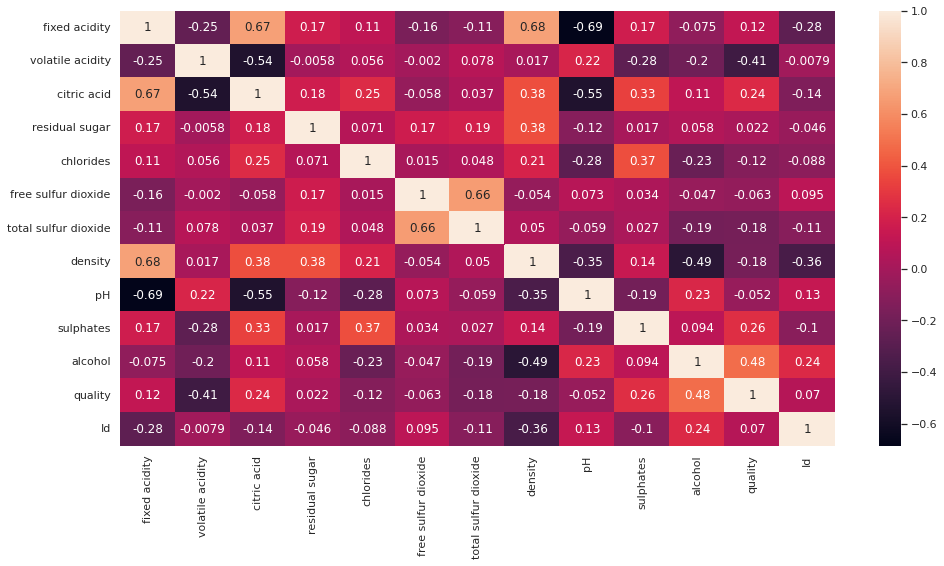

In [ ]:
sns.set()

# para definir el tamaño de cada dato
plt.figure(figsize=(16, 8))

sns.heatmap(df.corr(),annot = True)

Seleccionar las características a tener en cuenta en el estudio

In [ ]:
# campos : fixed acidity	,citric acid,residual sugar , density	, pH,sulphates,alcohol,
# quality

df_filtrado  = pd.DataFrame()
df_filtrado = df[['fixed acidity', 'citric acid','residual sugar','density',
                  'pH','sulphates','alcohol','quality']].copy()
                  
df_filtrado
# df_filtrado.plot()

,fixed acidity,citric acid,residual sugar,density,pH,sulphates,alcohol,quality
0,7.4,0.00,1.9,0.99780,3.51,0.56,9.4,5
1,7.8,0.00,2.6,0.99680,3.20,0.68,9.8,5
2,7.8,0.04,2.3,0.99700,3.26,0.65,9.8,5
3,11.2,0.56,1.9,0.99800,3.16,0.58,9.8,6
4,7.4,0.00,1.9,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...
1138,6.3,0.13,2.3,0.99574,3.42,0.75,11.0,6
1139,6.8,0.08,1.9,0.99651,3.42,0.82,9.5,6
1140,6.2,0.08,2.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.10,2.2,0.99512,3.52,0.76,11.2,6


Separar datos entre datos de entrada y etiquetas (resultados)

In [ ]:
x_wine = df_filtrado.drop('quality',axis = 1)
y_wine = df_filtrado['quality']



Separar datos entre entrenamiento y prueba (usando un 75% para entrenamiento y 25% para test)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_wine,y_wine,
                                                 train_size = 0.75,
                                                 test_size = 0.25
                                                 )

**Entrenamiento y predicción**


Elegir, instanciar y entrenar el modelo

In [ ]:
# con KNeighborsClassifier

# parametros
k = 3
w = 'uniform'

# elegimos clasificador

# instanciamos el modelo
model = KNeighborsClassifier(k,weights=w)

# entrenamiento
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

Realizar una predicción con los datos de prueba

In [ ]:
# prediccion
y_model = model.predict(x_test)

**Evaluación**

Mostrar el porcentaje de elementos correctamente clasificados

In [ ]:
# evaluacion

# Mostrar el porcentaje de elementos correctamente clasificados
accuracy_score(y_test,y_model)

0.527972027972028

Mostrar la predicción realizada (imprimir la variable con la predicción)


In [ ]:
y_model

array([6, 6, 5, 6, 6, 5, 5, 6, 6, 7, 6, 5, 5, 7, 6, 6, 6, 5, 6, 6, 5, 5,
       6, 5, 5, 5, 6, 6, 7, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6,
       5, 6, 5, 6, 7, 7, 5, 6, 6, 6, 6, 5, 6, 5, 5, 6, 5, 6, 6, 5, 7, 7,
       5, 6, 6, 5, 6, 5, 6, 6, 5, 7, 7, 5, 6, 6, 5, 5, 6, 5, 5, 7, 5, 7,
       5, 6, 4, 6, 5, 5, 5, 5, 7, 5, 7, 5, 6, 5, 6, 5, 5, 5, 7, 5, 7, 5,
       5, 6, 5, 6, 5, 5, 7, 6, 5, 6, 6, 5, 6, 6, 6, 5, 5, 5, 6, 7, 5, 5,
       6, 6, 6, 5, 5, 5, 5, 6, 6, 5, 4, 7, 6, 5, 6, 6, 5, 5, 5, 5, 6, 7,
       6, 6, 6, 6, 5, 6, 5, 6, 6, 5, 5, 5, 6, 5, 5, 6, 6, 7, 5, 6, 5, 5,
       5, 6, 5, 6, 6, 5, 5, 6, 5, 6, 7, 6, 5, 4, 5, 5, 6, 6, 6, 6, 6, 7,
       6, 4, 6, 5, 5, 7, 6, 6, 5, 6, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 7, 5,
       5, 6, 6, 6, 6, 4, 5, 5, 6, 7, 5, 6, 6, 5, 6, 5, 5, 5, 6, 5, 7, 7,
       5, 5, 5, 5, 6, 7, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 4, 7, 6, 7, 7, 6,
       5, 6, 5, 6, 6, 5, 6, 6, 7, 6, 5, 5, 5, 6, 5, 6, 7, 6, 5, 6, 6, 7])

Representar gráficamente la clasificación obtenida (matriz de confusión)


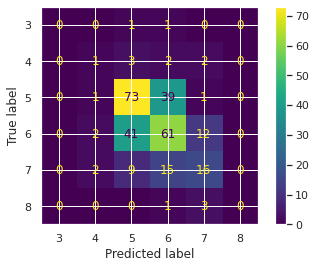

In [ ]:
cm = confusion_matrix(y_test, y_model, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

plt.show()

**Optimización (probar el proceso con distintos clasificadores)**


**METODO DE RadiusNeighborsClassifier**

In [ ]:
# instanciamos el modelo
model = RadiusNeighborsClassifier(radius = 2)


# entrenamiento
model.fit(x_train,y_train)

# prediccion
y_model = model.predict(x_test)

# predict_proba([[1.0]]))


# evaluacion
# Mostrar el porcentaje de elementos correctamente clasificados
accuracy_score(y_test,y_model)

0.5104895104895105

In [ ]:
# Mostrar la predicción realizada (imprimir la variable con la predicción)
y_model

array([5, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5,
       5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6,
       5, 6, 5, 5, 7, 6, 5, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5, 5, 6, 6,
       5, 5, 6, 5, 6, 5, 5, 6, 5, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6, 5, 5, 6,
       5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 7, 5, 6, 6, 6, 6, 5, 6, 5, 5, 7, 5,
       6, 5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6,
       6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 6, 5, 6, 5, 5, 5, 5,
       6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 6, 6, 5, 6, 6, 5, 5, 6, 6, 6, 6, 6,
       6, 5, 6, 5, 5, 7, 5, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 7, 5,
       6, 5, 5, 5, 5, 5, 5, 5, 6, 7, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6,
       6, 5, 6, 5, 6, 7, 5, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 7, 5,
       5, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 5, 5, 5, 5, 6, 6, 6, 5, 6, 6, 6])

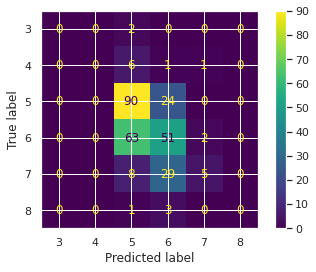

In [ ]:
# Representar gráficamente la clasificación obtenida (matriz de confusión)
cm = confusion_matrix(y_test, y_model, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

plt.show()


con KNeighborsClassifier se obtiene un 55% mientras que con RadiusNeighborsClassifier se obtiene un 52%. Respectivamente, en las matrices de confusion vemos una gran diferencia, mientras que en el primero el valor max es 82, en el otro el valor max es 106, y con el min, seria de 64 y 41.

**Optimización de hiperparámetros**

Calcula la combinación de parámetros óptima (uniform o distance; valor de k). Para ello
realiza ejecuciones con cada uno de los valores uniform y distance para los valores de k
desde 1 a 30.

In [ ]:
from pandas.core.dtypes.inference import is_file_like
# con KNeighborsClassifier

# parametros
# k = 3
# w = 'uniform'

valores_w = ['uniform','distance']
porcentajes = []
k_max = 0
w_max = ""

for w in valores_w:
  for k in range(1,31):
    # instanciamos el modelo
    model = KNeighborsClassifier(k,weights=w)

    # entrenamiento
    model.fit(x_train,y_train)

    # Mostrar la predicción realizada (imprimir la variable con la predicción)
    # y_model
    # print(y_model)

    y_model = model.predict(x_test)

    porcentajes.append(accuracy_score(y_test,y_model))

    if max(porcentajes) == accuracy_score(y_test,y_model):
      k_max = k
      w_max = w


    print(f"El porcentaje: {accuracy_score(y_test,y_model)} con k como: {k} y con w como: {w}")
  


El porcentaje: 0.5734265734265734 con k como: 1 y con w como: uniform
El porcentaje: 0.5664335664335665 con k como: 2 y con w como: uniform
El porcentaje: 0.527972027972028 con k como: 3 y con w como: uniform
El porcentaje: 0.5454545454545454 con k como: 4 y con w como: uniform
El porcentaje: 0.513986013986014 con k como: 5 y con w como: uniform
El porcentaje: 0.5209790209790209 con k como: 6 y con w como: uniform
El porcentaje: 0.541958041958042 con k como: 7 y con w como: uniform
El porcentaje: 0.5174825174825175 con k como: 8 y con w como: uniform
El porcentaje: 0.5104895104895105 con k como: 9 y con w como: uniform
El porcentaje: 0.5209790209790209 con k como: 10 y con w como: uniform
El porcentaje: 0.534965034965035 con k como: 11 y con w como: uniform
El porcentaje: 0.541958041958042 con k como: 12 y con w como: uniform
El porcentaje: 0.5524475524475524 con k como: 13 y con w como: uniform
El porcentaje: 0.541958041958042 con k como: 14 y con w como: uniform
El porcentaje: 0.5524

In [ ]:
print(f"El valor max de porcentaje es:{max(porcentajes)}, con k={k_max}, y w={w_max}")

El valor max de porcentaje es:0.6433566433566433, con k=24, y w=distance


Cada ejecución anterior se deberá hacer usando validación cruzada (por ejemplo n_splits =
5). Con ello obtendremos una medida de bondad del modelo (accuracy_score o
mean_absolute_error)), como lo ejecutaremos 5 veces, calcularemos la media de esas 5
ejecuciones.


In [ ]:
kf = KFold(n_splits=5)
 
# parametros
k = k_max
w = w_max

# elegimos clasificador

# instanciamos el modelo
model = KNeighborsClassifier(k,weights=w)

# entrenamiento
model.fit(x_train,y_train)
 
score = model.score(x_train,y_train)
 
print("Metrica del modelo", score)
 
scores = cross_val_score(model, x_train, y_train, cv=kf, scoring="accuracy")
 
print("Metricas cross_validation", scores)
 
print("Media de cross_validation", scores.mean())
 
preds = model.predict(x_test)
 
score_pred = metrics.accuracy_score(y_test, preds)

print("Metrica en Test", score_pred)


Metrica del modelo 1.0
Metricas cross_validation [0.6744186  0.62790698 0.58479532 0.60818713 0.63157895]
Media de cross_validation 0.6253773969808242
Metrica en Test 0.6433566433566433


In [ ]:
# evaluacion
# Mostrar el porcentaje de elementos correctamente clasificados
accuracy_score(y_test,y_model)

0.6293706293706294

In [ ]:
# Mostrar la predicción realizada (imprimir la variable con la predicción)
y_model

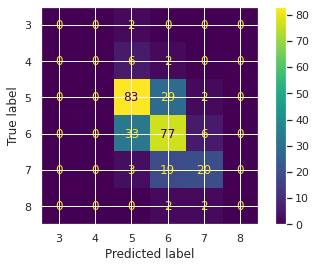

In [ ]:
cm = confusion_matrix(y_test, y_model, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

plt.show()